In [1]:
import numpy as np
import pandas as pd
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import skimage
import imageio.v2 as io
root = '/mnt/e/julia/regional-representations-graph-model/'
import sys
sys.path.append(root + 'train/')
from dataset_classes import * 
from models import *

In [2]:
import os
# import geemap
import geopandas as gpd

In [3]:
import os
def Count_files_in_subd():
    l = []
    counter=0
    for root, dirs, files in os.walk("download_landsat_images/"):
        # print("{} in {}".format(len(files), root))
        l.append(len(files))
        for f in files:
            if f == 'least_cloudy_rectangle_highres.tif':
                counter+=1
        if len(files) == 0:
            print(root)
    al = len(os.listdir("download_landsat_images/"))
    print(f'Num folders total: {al}')
    print(f'Num folders with 0 files: {l.count(0)}')
    print(f'Num folders with >0 files: {al - l.count(0)}')
    print(f'Num target files total: {counter}')
    print()
    
Count_files_in_subd()

download_landsat_images/
download_landsat_images/.ipynb_checkpoints
download_landsat_images/36031961400
download_landsat_images/36103990100
Num folders total: 8232
Num folders with 0 files: 4
Num folders with >0 files: 8228
Num target files total: 8226



# Plot 15 images

download_landsat_images/09001010101
download_landsat_images/09001010102
download_landsat_images/09001010201
download_landsat_images/09001010202
download_landsat_images/09001010300
download_landsat_images/09001010400
download_landsat_images/09001010500
download_landsat_images/09001010600
download_landsat_images/09001010700
download_landsat_images/09001010800
download_landsat_images/09001010900
download_landsat_images/09001011000
download_landsat_images/09001011100
download_landsat_images/09001011200
download_landsat_images/09001011300
download_landsat_images/09001020101
download_landsat_images/09001020102
download_landsat_images/09001020200
download_landsat_images/09001020301
download_landsat_images/09001020302
download_landsat_images/09001020400
download_landsat_images/09001020500
download_landsat_images/09001020600
download_landsat_images/09001020700
download_landsat_images/09001020800
download_landsat_images/09001020900
download_landsat_images/09001021000
download_landsat_images/0900

KeyboardInterrupt: 

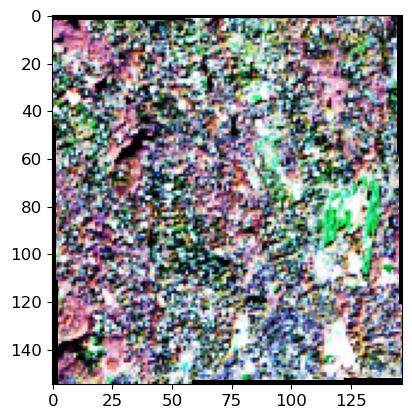

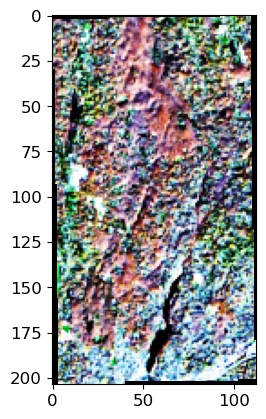

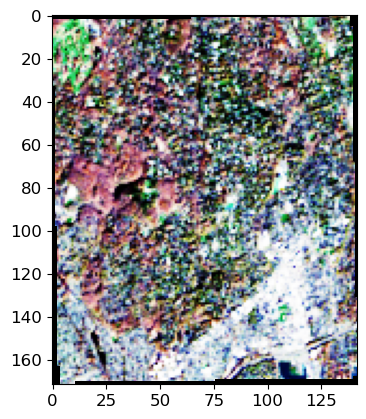

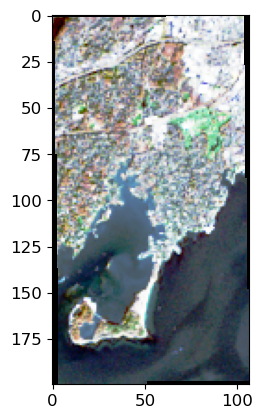

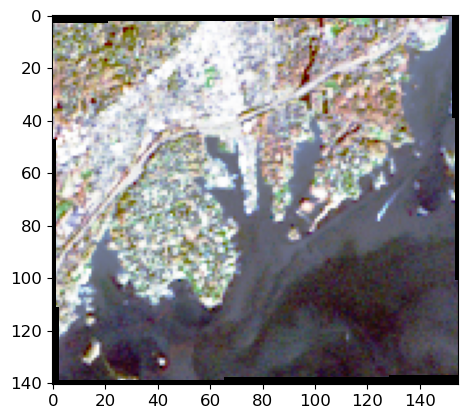

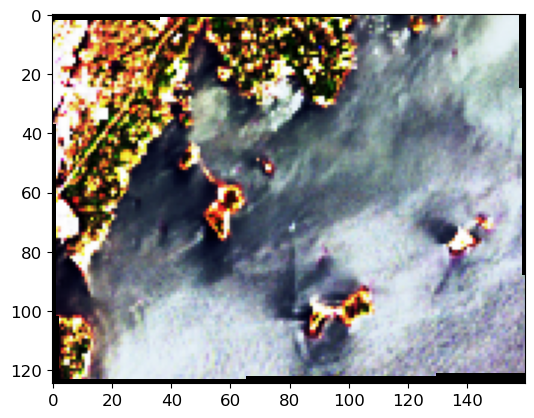

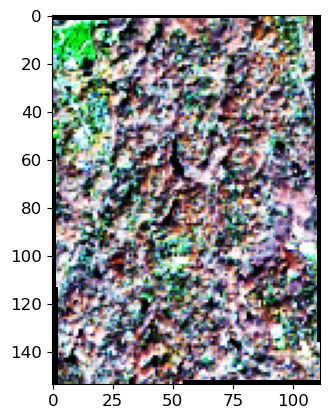

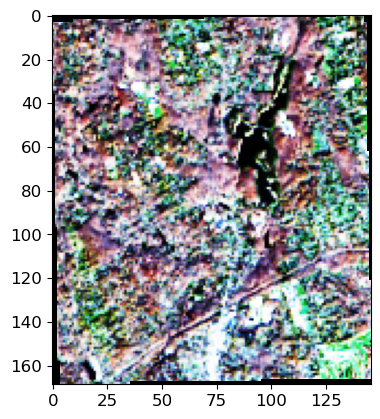

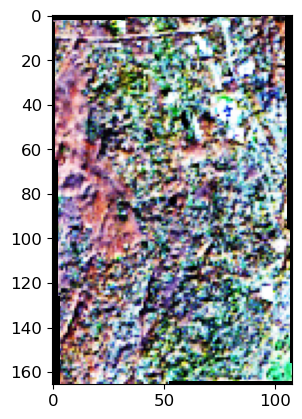

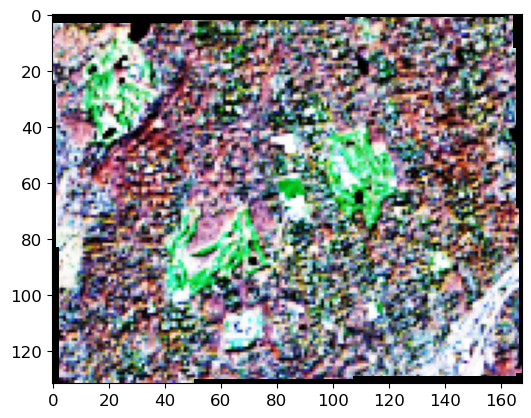

In [65]:
pixels_list = []
counter = 0
for root, dirs, files in os.walk("download_landsat_images/"):
    if 'least_cloudy_rectangle_highres.tif' in files:
        print(root)
        img = io.imread(root + '/least_cloudy_rectangle_highres.tif')
        npixels = img.shape[0] * img.shape[1]
        if npixels > 16000 and npixels < 25000:
            B2_blue = img[:,:,0]
            B3_green = img[:,:,1]
            B4_red = img[:,:,2]

            rgb = np.stack([B4_red, B3_green, B2_blue])
            mod = rgb.transpose(1, 2, 0)
            mod[mod == -np.inf] = np.nan

            mod1 = make_color_image_eqh(mod[:,:,0], mod[:,:,1], mod[:,:,2])
            
            plt.figure()
            plt.imshow(mod1)
            
#         pixels_list.append(npixels)
            counter += 1
            if counter > 15:
                break

In [16]:
max(pixels_list)

2341180

In [22]:
pixels = pd.Series(pixels_list)
pixels.describe()

count    8.226000e+03
mean     3.536704e+04
std      1.167542e+05
min      7.200000e+01
25%      8.700000e+02
50%      4.221000e+03
75%      1.663775e+04
max      2.341180e+06
dtype: float64

In [38]:
pixels.median()

4221.0

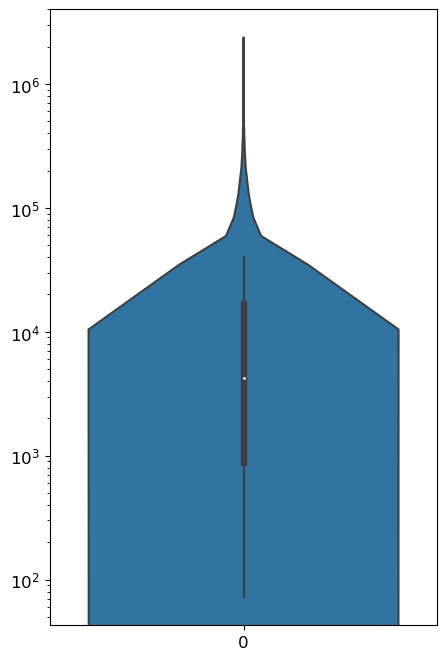

In [32]:
plt.figure(figsize=(5, 8))
sns.violinplot(pixels)
plt.yscale('log')

(0.0, 5000.0)

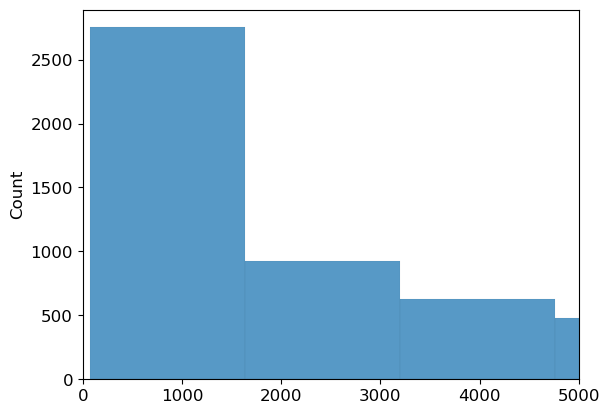

In [18]:
import seaborn as sns
sns.histplot(pixels_list)
plt.xlim([0, 5000])

In [2]:
# import os# run to delete a file
# for root, dirs, files in os.walk("download_landsat_images/"):
#     if root == 'download_landsat_images/' or root == 'download_landsat_images/.ipynb_checkpoints' :
#         continue
#     path = root + '/' + 'least_cloudy_rectangle_highres.tif'
#     files = os.listdir(root)
#     for f in files:
#         if 'least' not in f:
#             try:
#                 os.remove(root+'/'+f)
#                 print('delete')
#             except:
#                 continue
# #     try:
# #         os.remove(path)
# #     except:
# #         print('.')

# READ and NORMALIZE IMAGES


In [3]:
def norm(band, maximum=1):
    band_min, band_max = np.nanmin(band), np.nanmax(band)
    
    return ((band - band_min)/(band_max - band_min))*maximum

def make_color_image_eqh(
    b1, b2, b3, 
):
   
    eq_b1 = skimage.exposure.equalize_hist(b1, mask=(~np.isnan(b1)))
    eq_b2 = skimage.exposure.equalize_hist(b2, mask=(~np.isnan(b2)))
    eq_b3 = skimage.exposure.equalize_hist(b3, mask=(~np.isnan(b3)))

    # normalize data to 0<->1
    b1_norm = norm(eq_b1)
    b2_norm = norm(eq_b2)
    b3_norm = norm(eq_b3)

    # create three color image
#     rgb = np.stack([b1_norm, b2_norm, b3_norm], axis=2)
    
    
    rgb = np.dstack((b1_norm, b2_norm, b3_norm))

    return rgb

def equalize_exposure(b1, b2, b3):
    eq_b1 = skimage.exposure.equalize_hist(b1, mask=(~np.isnan(b1)))
    eq_b2 = skimage.exposure.equalize_hist(b2, mask=(~np.isnan(b2)))
    eq_b3 = skimage.exposure.equalize_hist(b3, mask=(~np.isnan(b3)))
    
    rgb = np.dstack((eq_b1, eq_b2, eq_b3))

    return rgb

# Read a single image. 

(65, 84, 3)


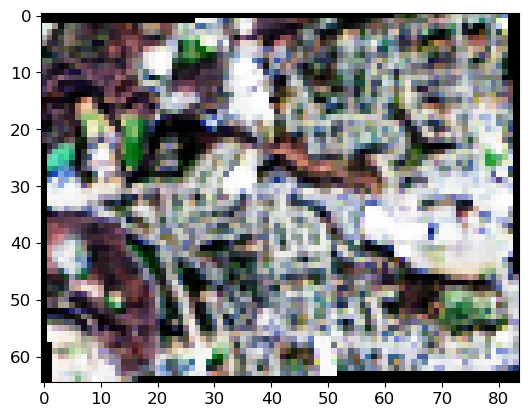

In [61]:
# Normalize and adjust brightness of each band individually
plt.rcParams.update({'font.size': 12})

img_path = 'download_landsat_images/09003514500/least_cloudy_rectangle_highres.tif'
img = io.imread(img_path)

B2_blue = img[:,:,0]
B3_green = img[:,:,1]
B4_red = img[:,:,2]

rgb = np.stack([B4_red, B3_green, B2_blue])
mod = rgb.transpose(1, 2, 0)
mod[mod == -np.inf] = np.nan

mod1 = make_color_image_eqh(mod[:,:,0], mod[:,:,1], mod[:,:,2])

print(mod.shape)
plt.figure()
plt.imshow(mod1)
# plt.figure()
# plt.imshow(mod2)

# Same for multiple randomly chosen images.

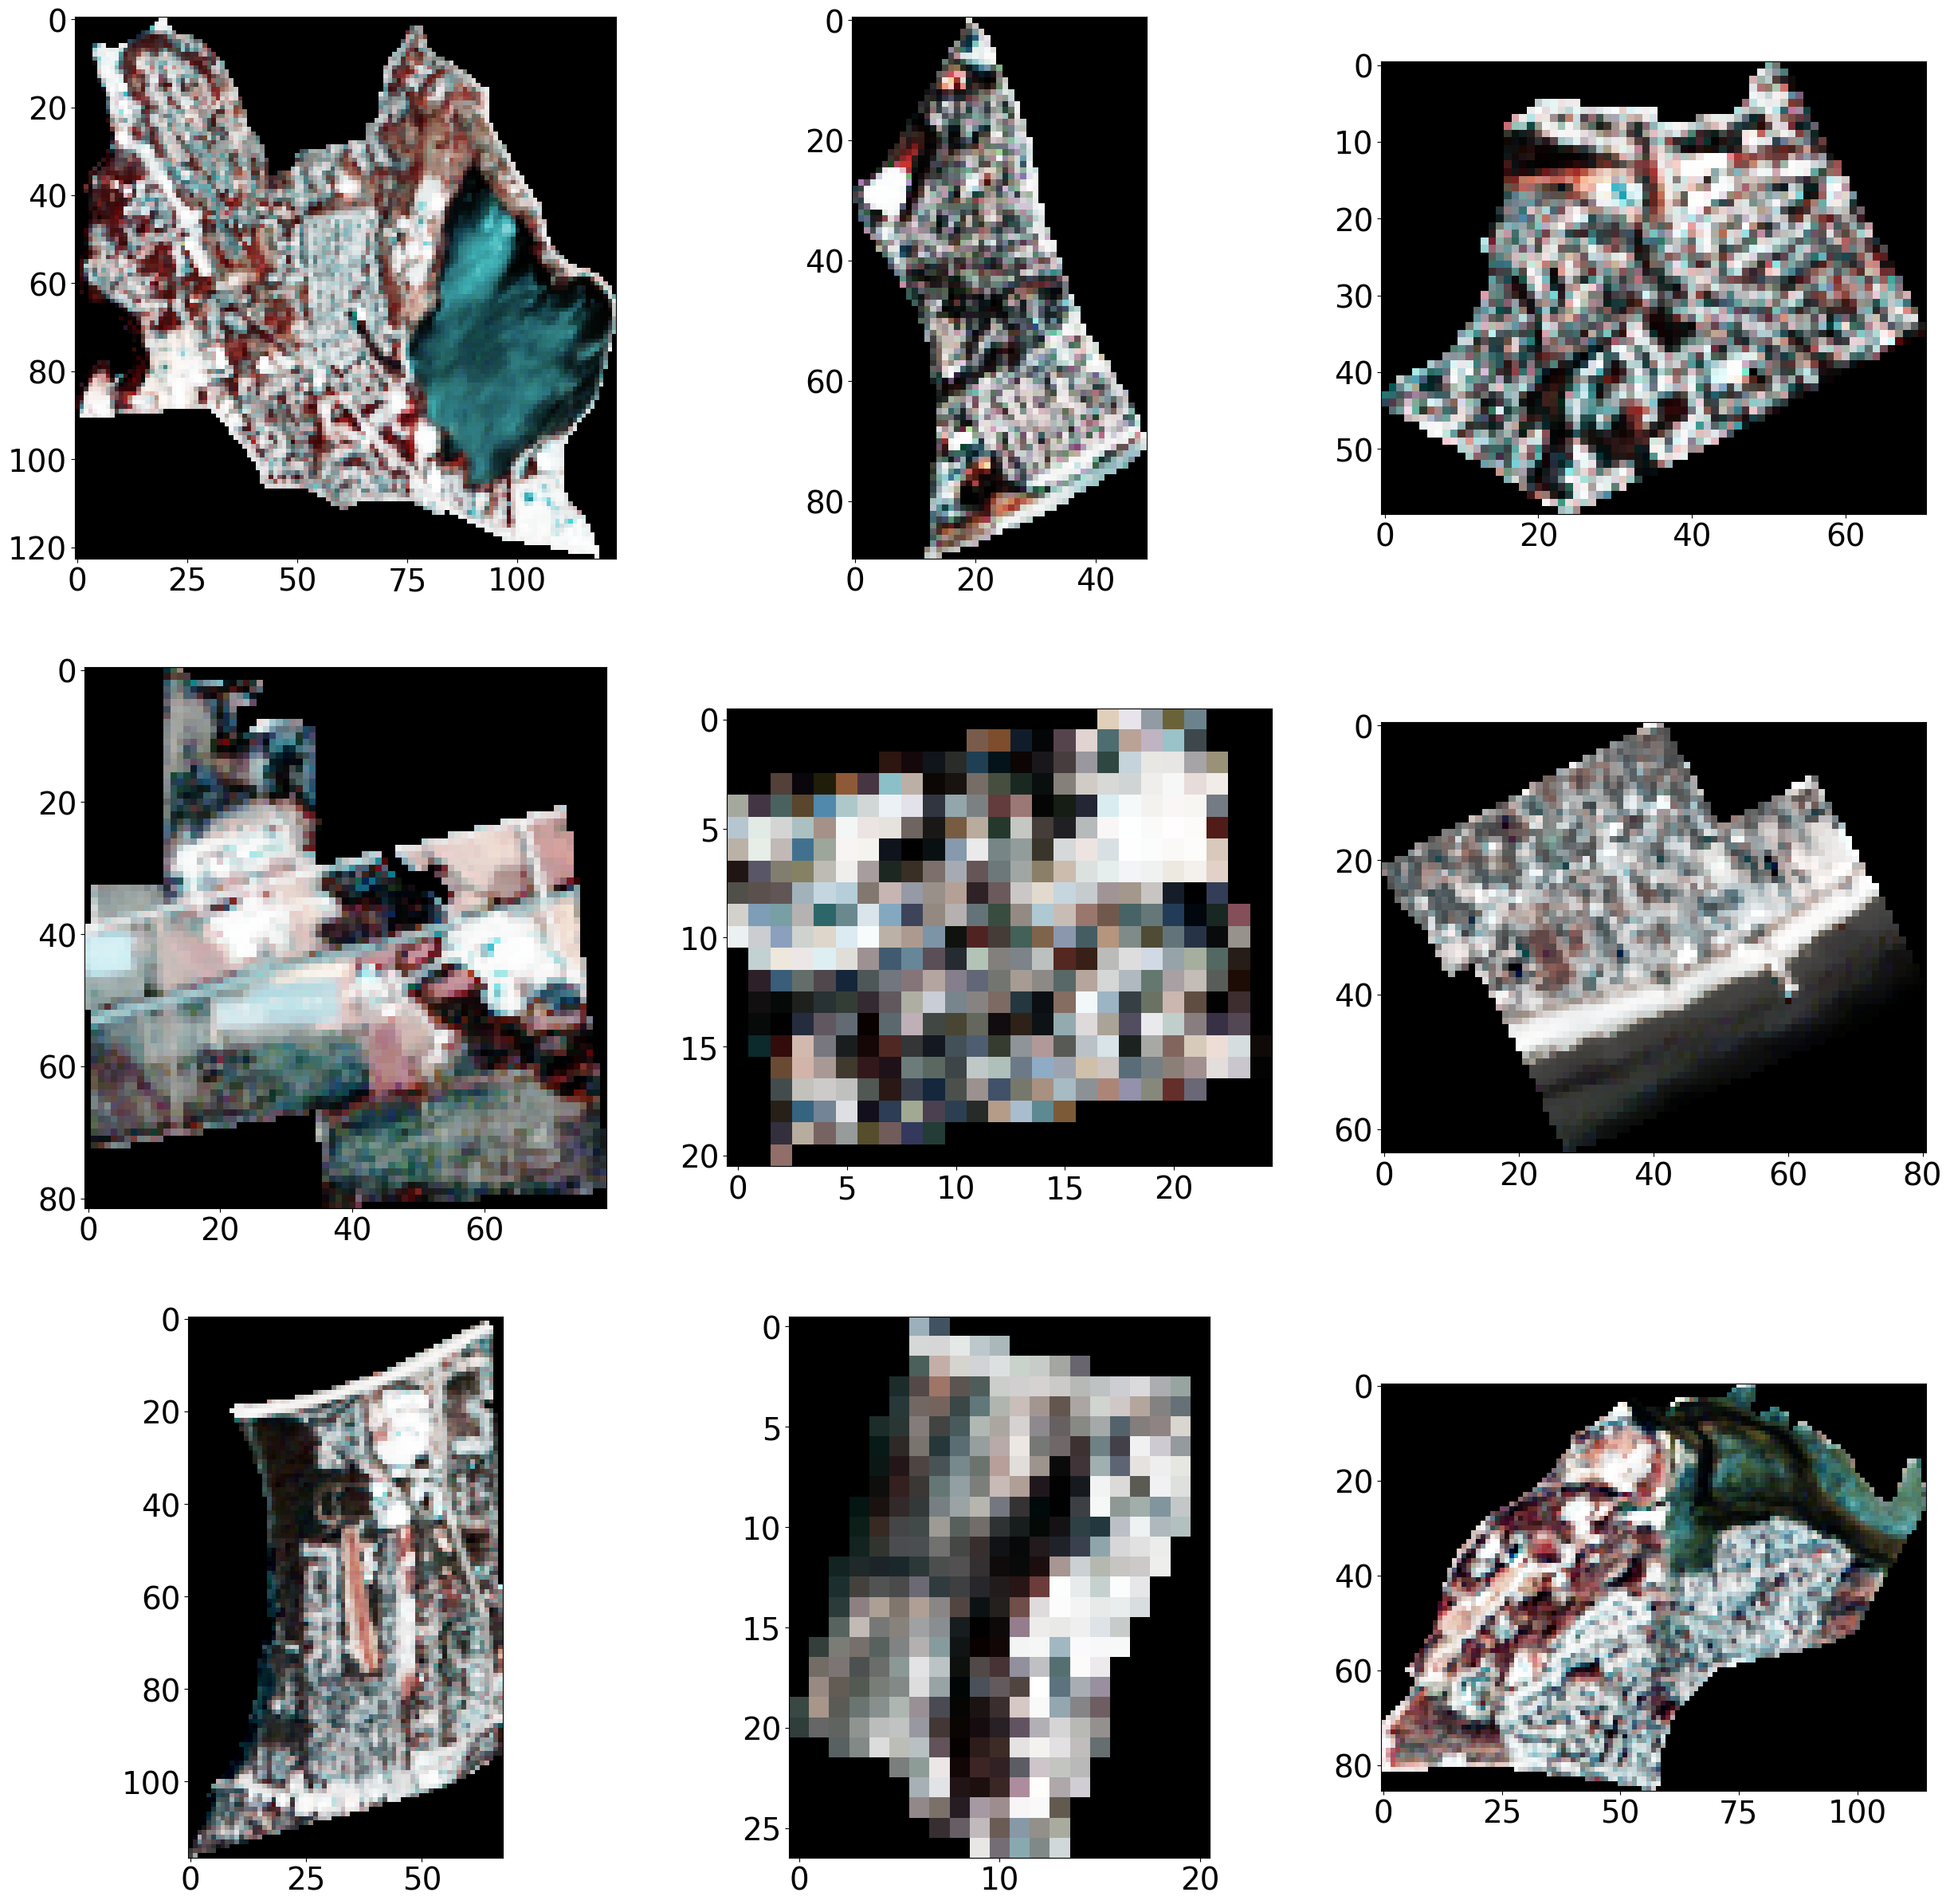

In [102]:
import random
plt.rcParams.update({'font.size': 28})
r, c = 3, 3

dirs = [x[0] for x in os.walk('download_landsat_images/')]
fig, axs = plt.subplots(r, c, figsize=(30, 30))
for i in range(r):
    for j in range(c):
        select = random.choice(dirs)
        img = imageio.imread(f'{select}/least_cloudy_clipped_highres.tif')
    
        B2_blue = img[:,:,0]
        B3_green = img[:,:,1]
        B4_red = img[:,:,2]
        
        rgb = np.stack([B4_red, B3_green, B2_blue])
        mod = rgb.transpose(1, 2, 0)
        mod[mod == -np.inf] = np.nan

#         # normalize
#         mod1 = np.zeros(mod.shape)
#         mod2 = np.zeros(mod.shape)
#         for band in (0,1,2):
#             mod1[:,:,band] = norm(mod[:,:,band])
        
        mod1 = make_color_image_eqh(mod[:,:,0], mod[:,:,1], mod[:,:,2])
        
#         mod1 = mod1[0:20, 0:20, :]
        
        axs[i][j].imshow((mod1))

In [8]:
print(f'Max: {np.nanmax(mod)}')
print(f'Min: {np.nanmin(mod)}')

print(f'Max: {np.nanmax(mod1)}')
print(f'Min: {np.nanmin(mod1)}')

Max: 0.6127372980117798
Min: 0.036960139870643616
Max: 1.0
Min: 0.0


# Plot original vs transformed

Below is the original versus the transformed image using the full typical ResNet transformation described in the below box.

In [4]:
import torch
import torchvision

transforms = torchvision.transforms.Compose([
            torchvision.transforms.Resize((224, 224)),
            torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])


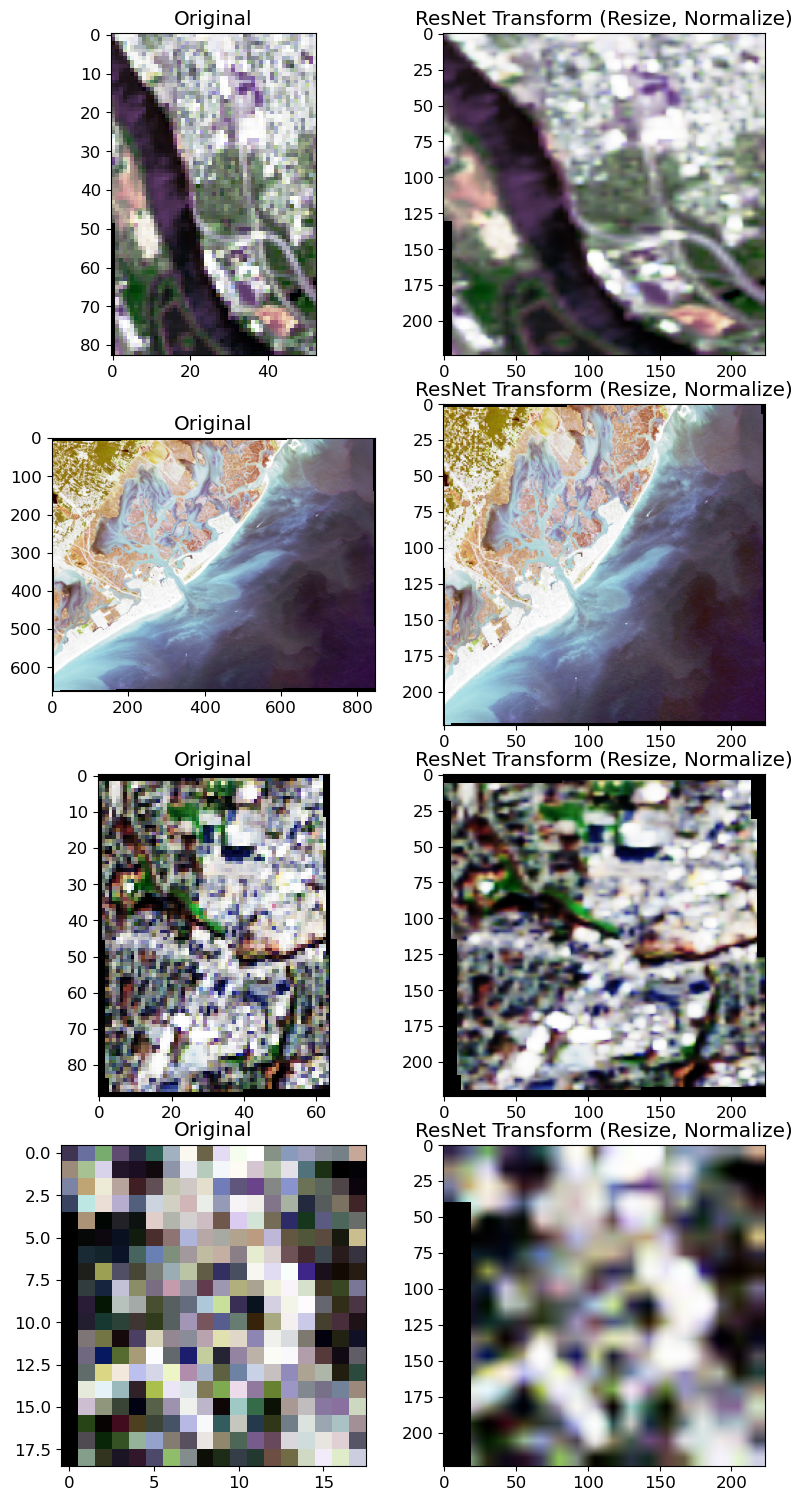

In [7]:
import random
plt.rcParams.update({'font.size': 12})
r, c = 4, 2

dirs = [x[0] for x in os.walk('download_landsat_images/')]
fig, axs = plt.subplots(r, c, figsize=(8, 15))
fig.tight_layout()
for i in range(r):
    select = random.choice(dirs)
    img = imageio.imread(f'{select}/least_cloudy_rectangle_highres.tif')

    img = np.array(img)
    B1 = img[:,:,0]
    B2 = img[:,:,1]
    B3 = img[:,:,2]
    rgb = np.stack([B3, B2, B1], axis=0)
    
    # original
    rgb1 = rgb.transpose(1, 2, 0)
    rgb1[rgb1 == -np.inf] = np.nan
    rgb1[rgb1 == np.inf] = np.nan
    
    mod1 = equalize_exposure(rgb1[:,:,0], rgb1[:,:,1], rgb1[:,:,2]) #make_color_image_eqh
    axs[i][0].set_title('Original')
    axs[i][0].imshow(mod1)
    
#     # transformed
    t = torch.tensor(rgb)
    out = np.array(transforms(t))
    out = out.transpose(1, 2, 0)
    out = equalize_exposure(out[:,:,0], out[:,:,1], out[:,:,2])
    
    axs[i][1].set_title('ResNet Transform (Resize, Normalize)')
    axs[i][1].imshow(out)

Below is the original versus the transformed image using just the ResNet normalization.

In [8]:
transforms = torchvision.transforms.Compose([
            torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])

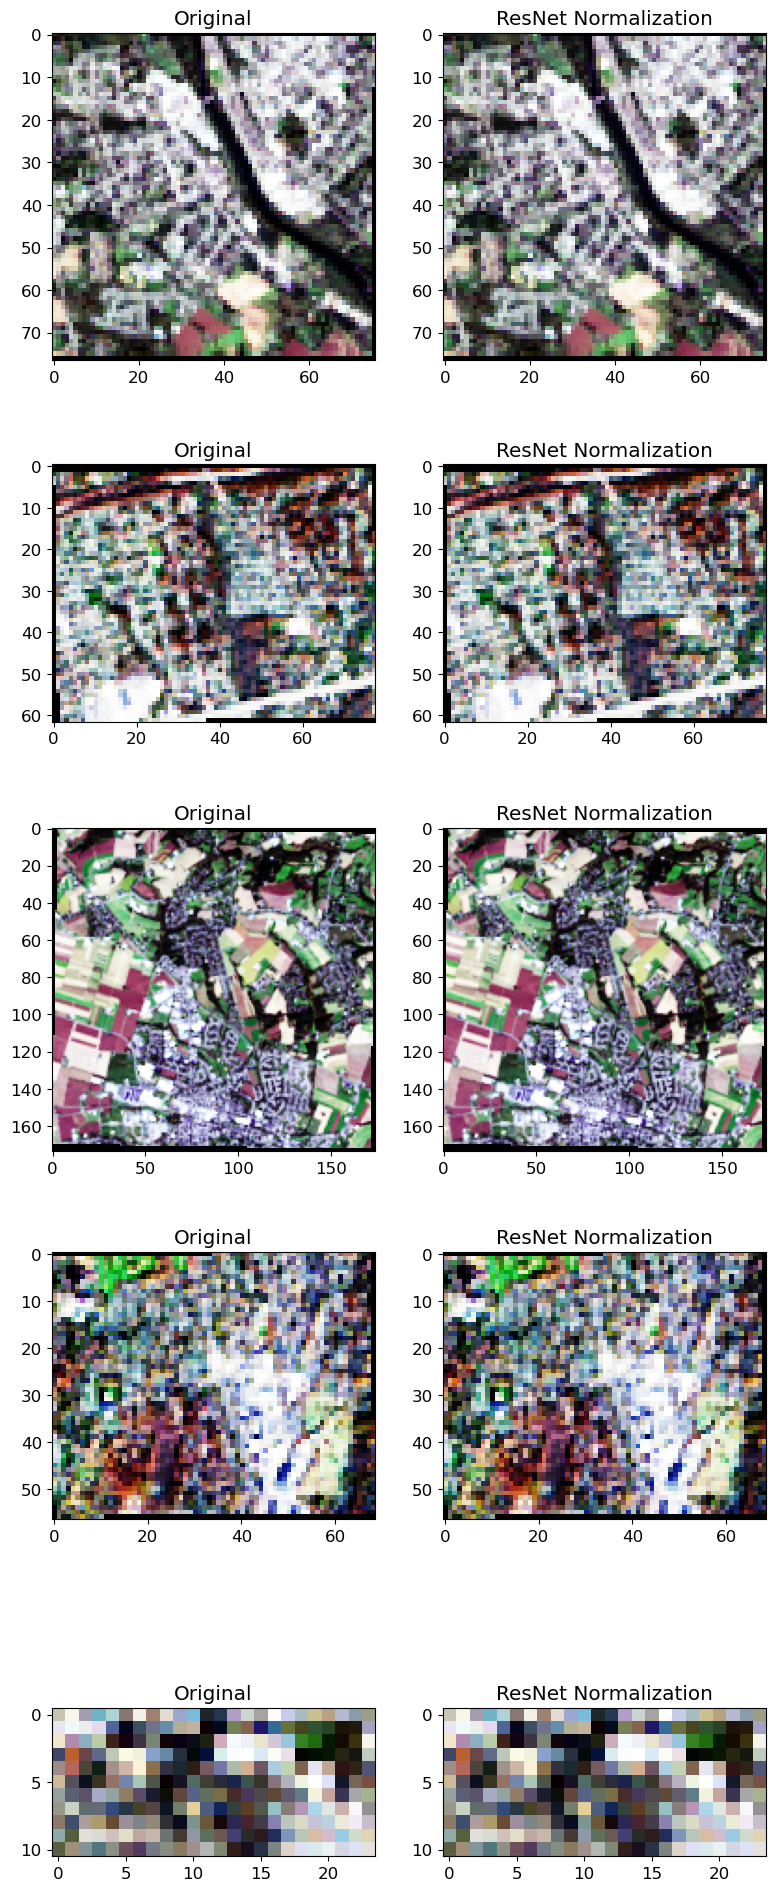

In [9]:
plt.rcParams.update({'font.size': 12})
r, c = 5, 2

dirs = [x[0] for x in os.walk('download_landsat_images/')]
fig, axs = plt.subplots(r, c, figsize=(8, 20))
fig.tight_layout()
for i in range(r):
    select = random.choice(dirs)
    img = imageio.imread(f'{select}/least_cloudy_rectangle_highres.tif')

    img = np.array(img)
    B1 = img[:,:,0]
    B2 = img[:,:,1]
    B3 = img[:,:,2]
    rgb = np.stack([B3, B2, B1], axis=0)
    
    # original (regular bandwise min-max normalization)
    rgb1 = rgb.transpose(1, 2, 0)
    rgb1[rgb1 == -np.inf] = np.nan
    rgb1[rgb1 == np.inf] = np.nan
    
    mod1 = make_color_image_eqh(rgb1[:,:,0], rgb1[:,:,1], rgb1[:,:,2])
    axs[i][0].set_title('Original')
    axs[i][0].imshow(mod1)
    
    # transformed
    t = torch.tensor(rgb)
    out = np.array(transforms(t))
    out = out.transpose(1, 2, 0)
    out = equalize_exposure(out[:,:,0], out[:,:,1], out[:,:,2])
    
    axs[i][1].set_title('ResNet Normalization')
    axs[i][1].imshow(out)

# Check image downsample transformation

In [5]:
import skimage
root = '/mnt/e/julia/regional-representations-graph-model/'
scenario = 'highres_landsat_experiment/'
node_list_path= root + f'dataset/preprocessed_data/{scenario}node_list.csv'
device='cpu'

earth_engine_filename = 'least_cloudy_rectangle_highres.tif'
fn = earth_engine_filename

#### LANDSAT #####
landsat_model = ResNetTransform(device)
datasets1 = SatelliteImageryDataset(node_list_path=node_list_path, 
                                    root_image_dir=root + '/dataset/earth_engine/download_landsat_images', 
                                    fn=fn, is_train=True, transform=landsat_model, 
                                    load_embeddings=False)

Pytorch interpolation looks like it preserves the edges better than skimage.
https://stackoverflow.com/questions/64284755/what-is-the-upsampling-method-called-area-used-for

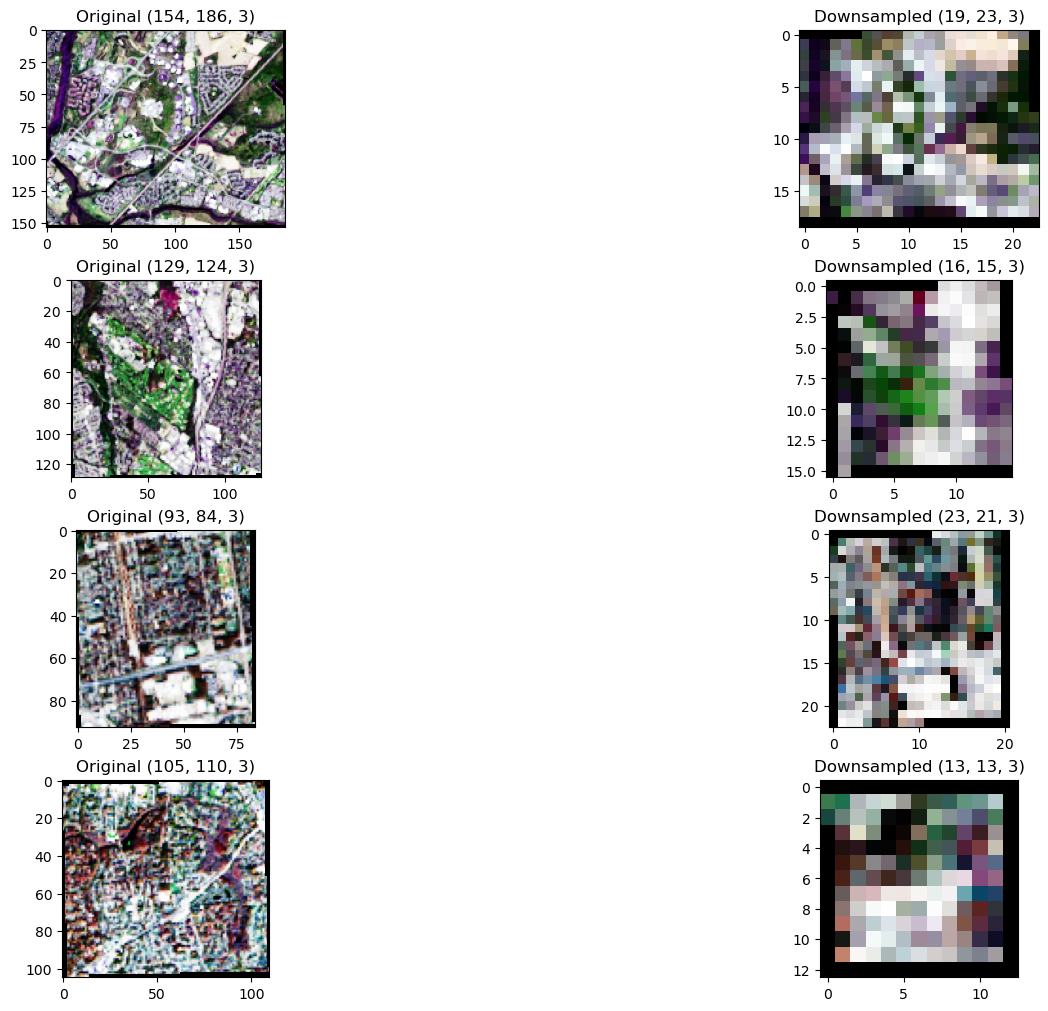

In [22]:
import random

plt.rcParams.update({'font.size': 10})
r, c = 4, 2

fig, axs = plt.subplots(r, c, figsize=(15, 10), constrained_layout=True)
for i in range(r):
    idx = random.randint(0, datasets1.__len__())
    x = datasets1.__getsampletest__(idx)
    x[x == -np.inf] = np.nan
    x[x == np.inf] = np.nan
    
    if x.shape[0] != 3:
        print(f'ERROR - Image dimensions incorrect. First dimension needs to be 3. Dimensions found are {x.shape}')
    
    # original
    out = x.copy()
    out = out.transpose(1, 2, 0)
    
    out = make_color_image_eqh(out[:,:,0], out[:,:,1], out[:,:,2]) #make_color_image_eqh
 
    axs[i][0].set_title(f'Original {out.shape}')
    axs[i][0].imshow(out)
    
#     # skimage downsample
#     out = x.copy()
#     npixels = out.shape[1] * out.shape[2]
#     while npixels > 483:
#         out = skimage.measure.block_reduce(out, block_size=(1, 2, 2), func=np.mean, cval=0, func_kwargs=None)
#         npixels = out.shape[1] * out.shape[2]
#     out = out.transpose(1, 2, 0)
#     out = make_color_image_eqh(out[:,:,0], out[:,:,1], out[:,:,2]) #make_color_image_eqh
    
#     if i == 0:
#         axs[i][1].set_title(f'Skimage Downsampling {out.shape}')
#     axs[i][1].imshow(out)
    
    # pytorch  downsample
    out = x.copy()
    out = torch.tensor(out)
    out = out.unsqueeze(0)
    
    npixels = out.shape[2] * out.shape[3]
    while npixels > 483:
        out = nn.functional.interpolate(out, scale_factor=(0.5, 0.5), mode='area')
        npixels = out.shape[2] * out.shape[3]
    out = out.squeeze()
    out = np.array(out)
    out = out.transpose(1, 2, 0)
    
    
    out = make_color_image_eqh(out[:,:,0], out[:,:,1], out[:,:,2])

    axs[i][1].set_title(f'Downsampled {out.shape}')
    axs[i][1].imshow(out)
    

# What do the clipped images look like?

(22, 28, 17)
(22, 37, 17)
(22, 28, 17)
(22, 37, 17)


/tmp/ipykernel_165168/862300552.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread(f'download_test/ct1.tif')
/tmp/ipykernel_165168/862300552.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread(f'download_test/ct2.tif')
/tmp/ipykernel_165168/862300552.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img3 = imageio.imread(f'download_test

Text(0.5, 0.98, 'Band 2 (blue)')

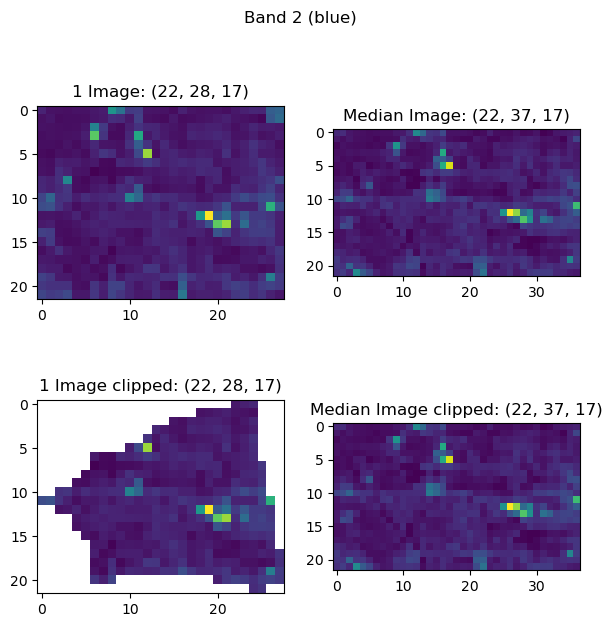

In [9]:
# Load images
import imageio
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

img1 = imageio.imread(f'download_test/ct1.tif')
img2 = imageio.imread(f'download_test/ct2.tif')
img3 = imageio.imread(f'download_test/ct1_clipped.tif')
img4 = imageio.imread(f'download_test/ct2_clipped.tif')

for ax, img, title in zip(axs.flatten(), [img1, img2, img3, img4], 
                          ['1 Image', 'Median Image', '1 Image clipped', 'Median Image clipped']):
    B2_blue = img[:,:,1]
    B3_green = img[:,:,2]
    B4_red = img[:,:,3]

    print(img.shape)
    ax.imshow(B2_blue)
    ax.set_title(f'{title}: {img.shape}')
plt.suptitle('Band 2 (blue)', fontsize=(12))